In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def is_left_of_line(p, hull, end):
    """
    Comput the relative position of p to (hull, end).
    Returns True if p is on the left of the segment
    
    Parameters 
    ----------
    p : pd.Pandas
        Tuple ('x', 'y') of considered point
    hull : pd.Series
        Coordinates ('x', 'y') of point in hull
    end : pd.Series
        Coordinates('x', 'y') of current end_point
    """
    return ((end.x - p.x) * (hull.y - p.y) - (hull.x - p.x) * (end.y - p.y)) < 0

In [24]:
def jarvis_march(points):
    """
    Compute the convex hull of 2-dimension points
    
    Parameters
    ----------
    points : pd.DataFrame
        DataFrame with x and y coordinates for each point.
    """
    
    # leftmost point is in the convex hull set
    leftmost_point_index = points.x.idxmin() 
    point_on_hull = points.loc[leftmost_point_index] 
    end_point = points.loc[(leftmost_point_index + 1) % len(points)] # next point randomly selected
    convex_hull = pd.DataFrame(data=[point_on_hull], columns=points.columns) # dataframe containing convex hull set
    
    # while the convex hull is not fully determined
    while not np.all(point_on_hull == end_point):
        for p in points.itertuples(index=False):
            if is_left_of_line(p, point_on_hull, end_point): # checks the position of p relative to (point_on_hull, end_point)
                end_point = p # new end point if negative

        # updating points to consider
        point_on_hull = end_point
        end_point = convex_hull.iloc[0]
        
        # appending point to convex_hull set
        convex_hull = convex_hull.append(pd.DataFrame([point_on_hull], columns=convex_hull.columns), ignore_index=True)
    
    # scatterplot of dataset and convex hull
    plt.figure(figsize=(10,6))
    plt.scatter(data=points, x='x', y='y', label='Points')
    plt.scatter(data=convex_hull, x='x', y='y', label='Convex hull set')
    plt.legend()
    plt.show()

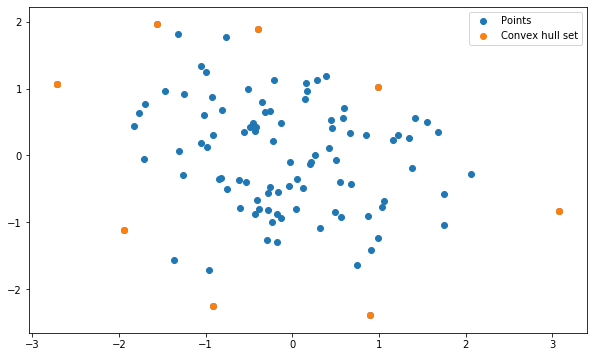

In [25]:
points = pd.DataFrame(np.random.normal(size=(100, 2)), columns=['x', 'y'])
jarvis_march(points)